Importamos nuestras librerías

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Visualizamos los datos:

In [172]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

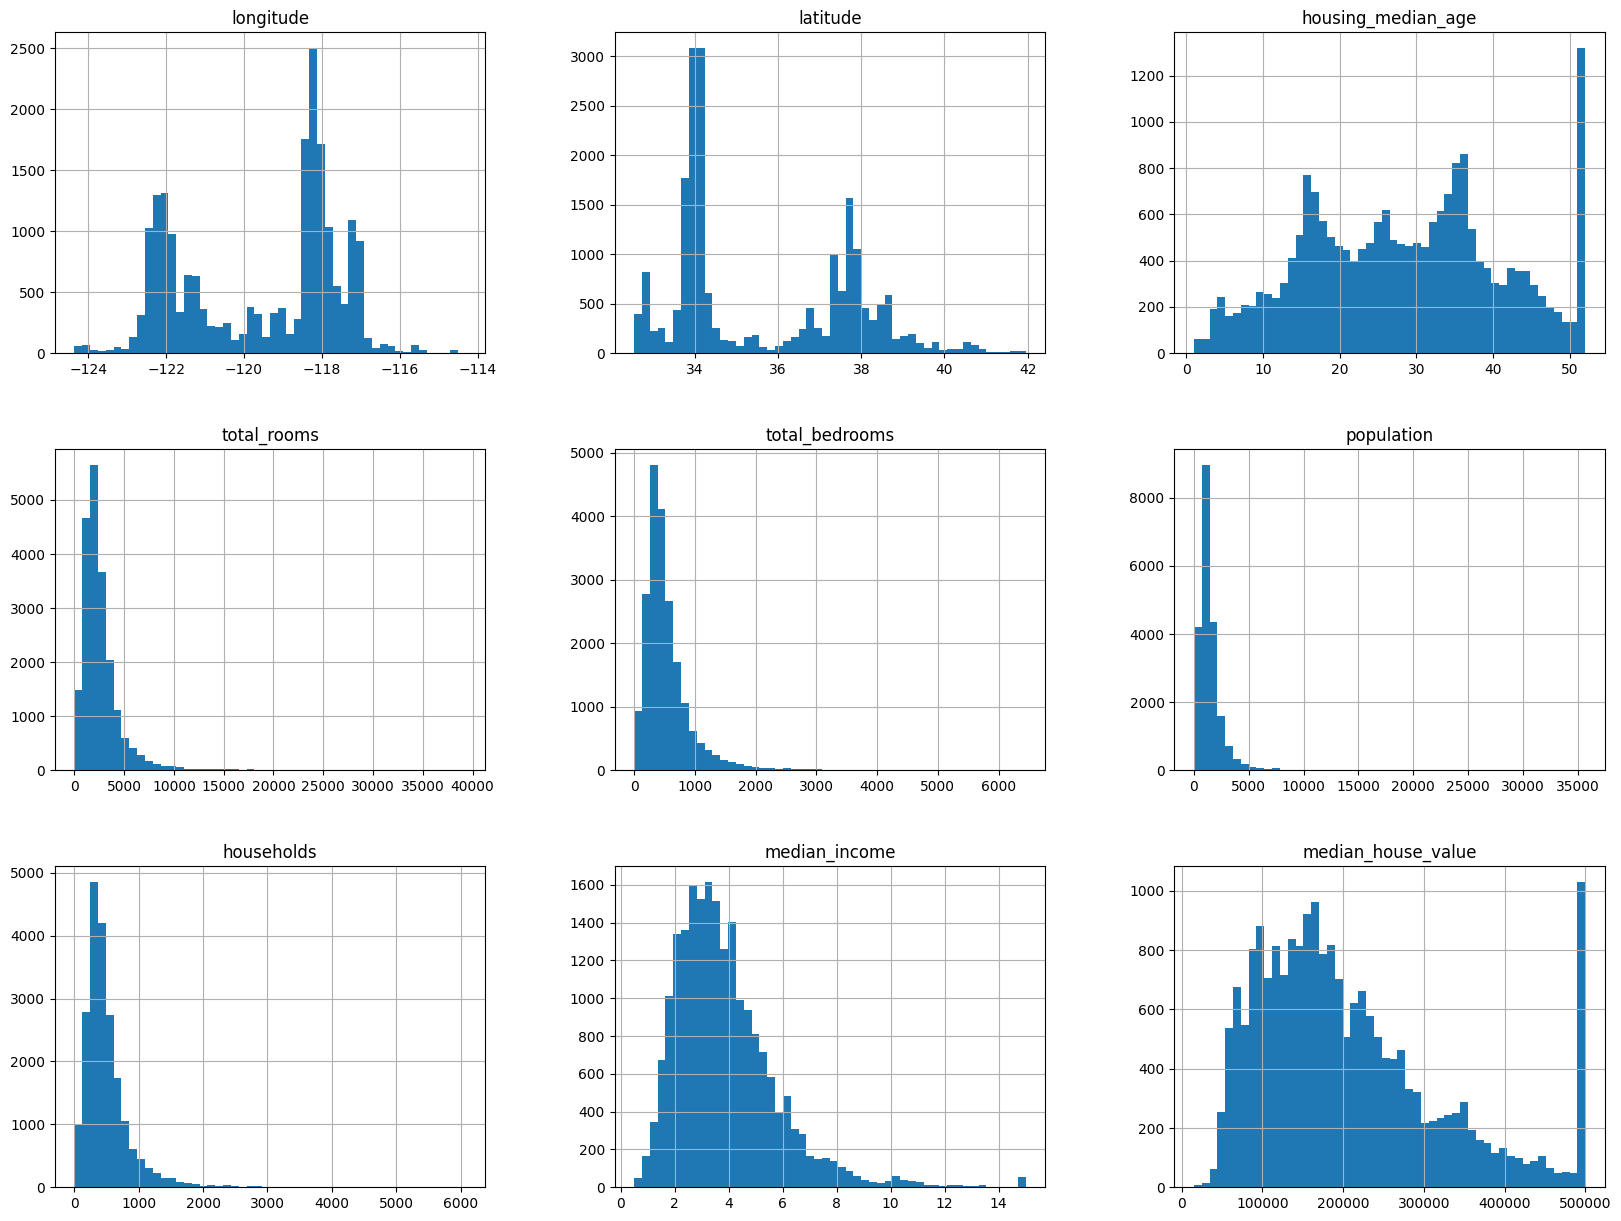

In [175]:
data.hist(bins=50, figsize=(20, 15))

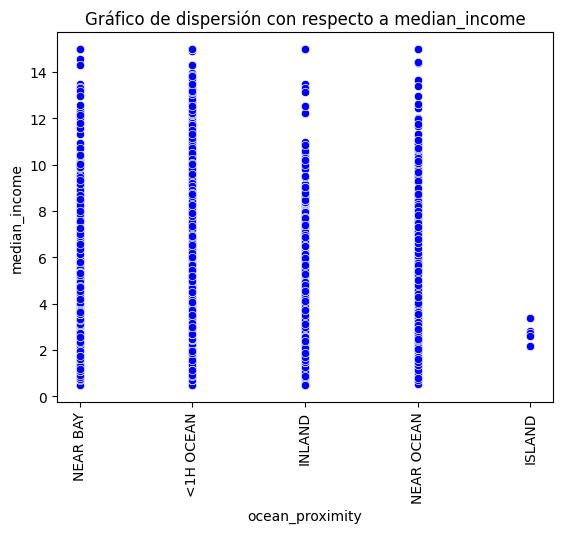

In [176]:
scatter = sns.scatterplot(x=data[col], y=data["median_income"], color= "b")
plt.xticks(rotation=90)
plt.title("Gráfico de dispersión con respecto a median_income")
plt.show()

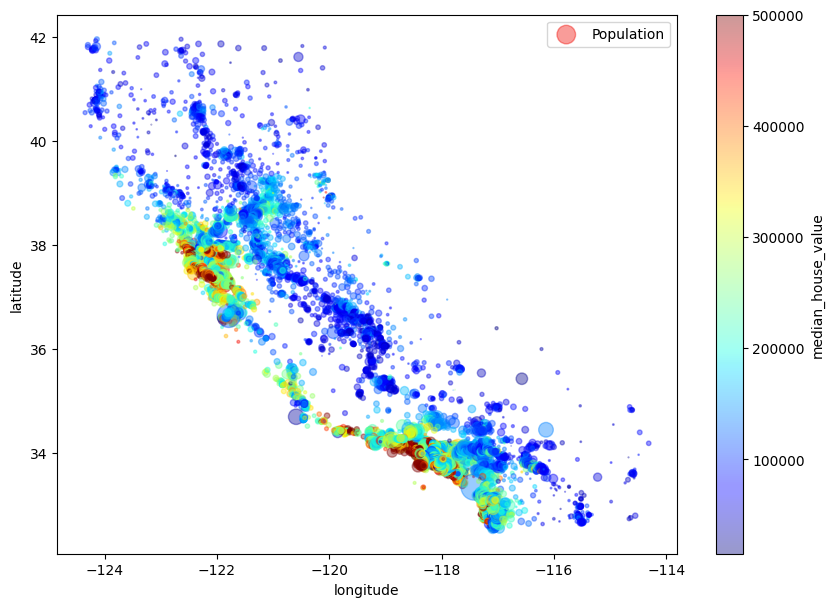

In [191]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="Population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
             sharex=False)
plt.legend()
plt.show()

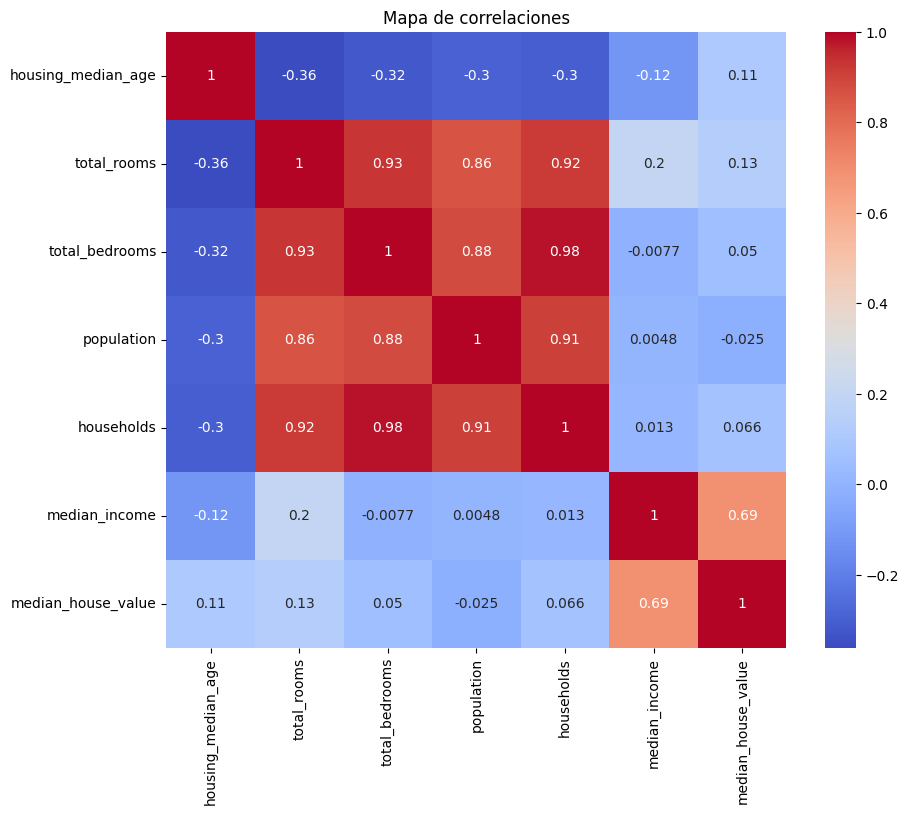

In [177]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns = ['latitude', 'longitude', 'ocean_proximity']).corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones')
plt.show()

Una vez vemos el mapa de calor de correlaciones vemos que median_house_value va a ser la variable que más se relaciona con median_income

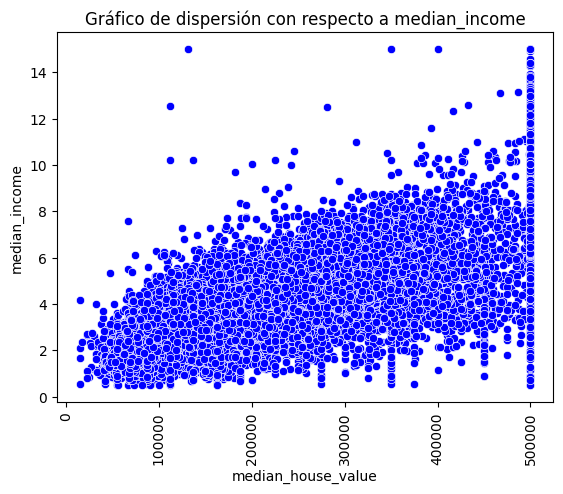

In [178]:
scatter_income = sns.scatterplot(x=data["median_house_value"], y=data["median_income"], color= "b")
plt.xticks(rotation=90)
plt.title("Gráfico de dispersión con respecto a median_income")
plt.show()

Comprobamos los dato y procedemos a limpiar nulos, duplicados, valores atípicos y pasamos a una misma unidad los datos que vamos a usar.

In [179]:
data["median_income"] = data["median_income"]*10000
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [180]:
total_rows = len(data)
missing_rows = data['total_bedrooms'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 1.00%


Borramos los nulos ya que no representan un valor muy elevado con respecto a todo el dataset.

In [181]:
data.dropna(inplace=True)

In [182]:
data = data.drop_duplicates()

Nos aseguramos que el tipo de dato sea int o float dependiendo de si lleve coma y después un 0 o no.

In [183]:
for column in data.columns:
    if data[column].dtype == float:
        all_integers = (data[column] % 1 == 0).all()
        
        print(f"All numbers are integers in column '{column}':", all_integers)
        
        if all_integers:
            data[column] = data[column].astype(int)
            print(f"Column '{column}' converted to integers.")
        else:
            print(f"There are some numbers that are not pure integers in column '{column}'.")
    else:
        print(f"No check needed for column '{column}' as it is not float.")

All numbers are integers in column 'longitude': False
There are some numbers that are not pure integers in column 'longitude'.
All numbers are integers in column 'latitude': False
There are some numbers that are not pure integers in column 'latitude'.
All numbers are integers in column 'housing_median_age': True
Column 'housing_median_age' converted to integers.
All numbers are integers in column 'total_rooms': True
Column 'total_rooms' converted to integers.
All numbers are integers in column 'total_bedrooms': True
Column 'total_bedrooms' converted to integers.
All numbers are integers in column 'population': True
Column 'population' converted to integers.
All numbers are integers in column 'households': True
Column 'households' converted to integers.
All numbers are integers in column 'median_income': False
There are some numbers that are not pure integers in column 'median_income'.
All numbers are integers in column 'median_house_value': True
Column 'median_house_value' converted to

Una vez que tenemos todos los datos limpios y hemos visto que variables queremos trabajar, procedemos a trabajar en el modelado.

In [184]:
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(x_train[['ocean_proximity']]).toarray()
encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['ocean_proximity']))
encoded_data

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0
16342,1.0,0.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,0.0,0.0,0.0,1.0,0.0


In [189]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

# Aplicar One-Hot Encoding a las columnas categóricas
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Separar características y objetivo
X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

Columnas categóricas: Index(['ocean_proximity'], dtype='object')
[201882.95986769 147279.68214378 207796.6097985  ... 110229.93045319
 137315.73282068 169083.81714054]
R^2 Score: 0.6488402154432085


Entrenamos el modelo y obtenemos resultados.

In [192]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Evaluar el modelo
score = model.score(X_test, y_test)
print("R^2 Score:", score)

R^2 Score: 0.6488402154432085
